# learn regresssion practical implementation

In [11]:
import pandas as pd

In [51]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [13]:
from sklearn.datasets import fetch_california_housing

In [14]:
california_housing=fetch_california_housing(as_frame=True)

In [15]:
df=fetch_california_housing()

In [16]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [17]:
dataset=pd.DataFrame(df.data)

In [18]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [19]:
dataset.columns=df.feature_names

In [20]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [21]:
##independent features and dependent features
X=dataset
y=df.target

In [22]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [23]:
## train test split
from sklearn.model_selection import train_test_split


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [25]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5088,0.9809,19.0,3.187726,1.129964,726.0,2.620939,33.98,-118.28
17096,4.2232,33.0,6.189696,1.086651,1015.0,2.377049,37.46,-122.23
5617,3.5488,42.0,4.821577,1.095436,1044.0,4.331950,33.79,-118.26
20060,1.6469,24.0,4.274194,1.048387,1686.0,4.532258,35.87,-119.26
895,3.9909,14.0,4.608303,1.089350,2738.0,2.471119,37.54,-121.96
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [26]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:
X_train=scaler.fit_transform(X_train)

In [28]:
X_test=scaler.transform(X_test)

In [29]:
X_train

array([[-1.52169954, -0.75868455, -0.91813082, ..., -0.04014979,
        -0.78315293,  0.65090402],
       [ 0.18205382,  0.3523991 ,  0.30748451, ..., -0.05943619,
         0.8475975 , -1.31911678],
       [-0.17232772,  1.06666717, -0.25107784, ...,  0.09515433,
        -0.87218816,  0.66087881],
       ...,
       [-0.49518065,  0.59048846, -0.59192622, ...,  0.01608523,
        -0.75972261,  0.60103008],
       [ 0.96816708, -1.07613702,  0.39144665, ...,  0.0039722 ,
         0.90383028, -1.18445713],
       [-0.68377427,  1.86029835, -0.83041358, ..., -0.08065717,
         0.9928655 , -1.41387727]])

In [30]:
scaler.inverse_transform(X_train)

array([[   0.9809    ,   19.        ,    3.18772563, ...,    2.62093863,
          33.98      , -118.28      ],
       [   4.2232    ,   33.        ,    6.18969555, ...,    2.37704918,
          37.46      , -122.23      ],
       [   3.5488    ,   42.        ,    4.82157676, ...,    4.33195021,
          33.79      , -118.26      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]])

In [31]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [32]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [33]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=15)

In [34]:
mse

array([-0.56423389, -0.50529466, -0.55834807, -0.44081654, -0.48699027,
       -0.56891311, -0.55795194, -0.45942035, -0.48054269, -0.47590449,
       -0.54669226, -0.53467236, -0.55980076, -0.5174106 , -0.57730287])

In [52]:
np.mean(mse)

-0.5222863233325831

In [53]:
##prediction
reg_pred=regression.predict(X_test)

In [54]:
reg_pred

array([0.72563462, 1.76650223, 2.70545812, ..., 1.25803135, 1.66673014,
       2.25826279])

C:\Users\paula\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


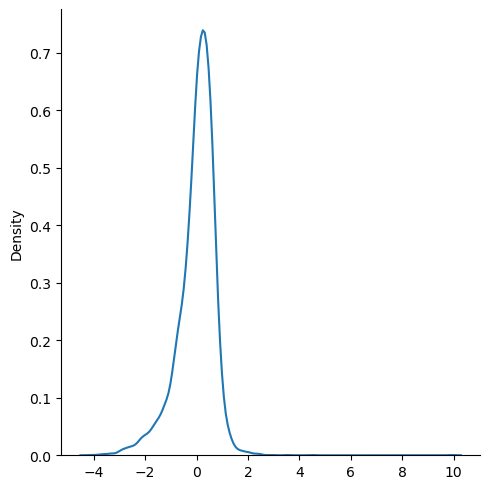

In [55]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [56]:
from sklearn.metrics import r2_score

In [57]:
score=r2_score(reg_pred,y_test)

In [58]:
score

0.33957429603867384

# Ridge regression algorithm

In [59]:
from sklearn.linear_model import Ridge

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
ridge_regressor=Ridge()

In [62]:
ridge_regressor

Ridge()

In [63]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [64]:
print(ridgecv.best_params_)

{'alpha': 5}


In [72]:
print(ridgecv.best_score_)

-0.5230459199911863


In [74]:
ridge_pred=ridgecv.predict(X_test)

C:\Users\paula\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


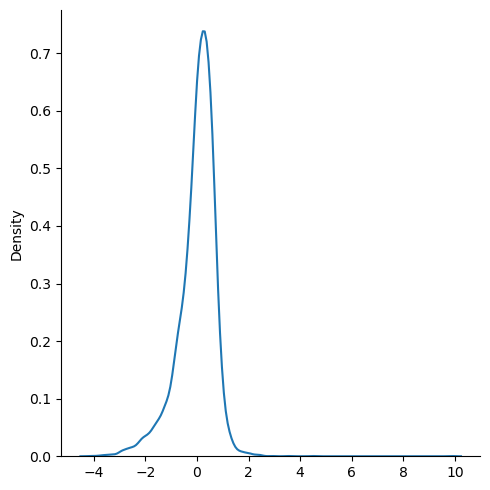

In [77]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [78]:
score=r2_score(ridge_pred,y_test)

In [79]:
score

0.3381785002377151

In [ ]:
#